In [169]:
using GLMakie
using Random
using Distributions
using Colors

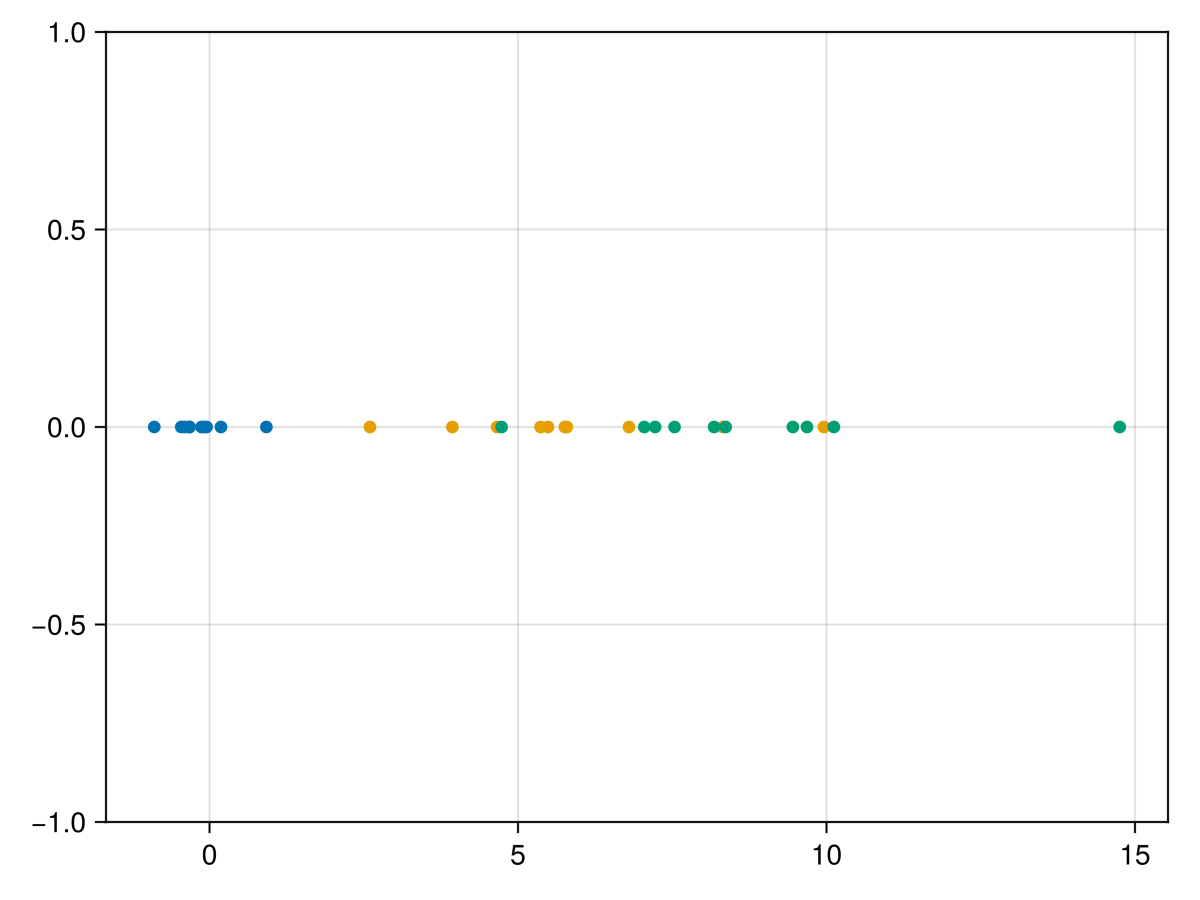

In [164]:
adist = Normal(0,1)
bdist = Normal(5,2)
cdist = Normal(10,3)

fig = Figure()
ax = Axis(fig[1,1])

n = 10

as = rand(adist, n)
bs = rand(bdist, n)
cs = rand(cdist, n)

non_as = vcat(bs,cs)
non_bs = vcat(as,cs)
non_cs = vcat(as,bs)

scatter!(as, zeros(n))
scatter!(bs, zeros(n))
scatter!(cs, zeros(n))

fig

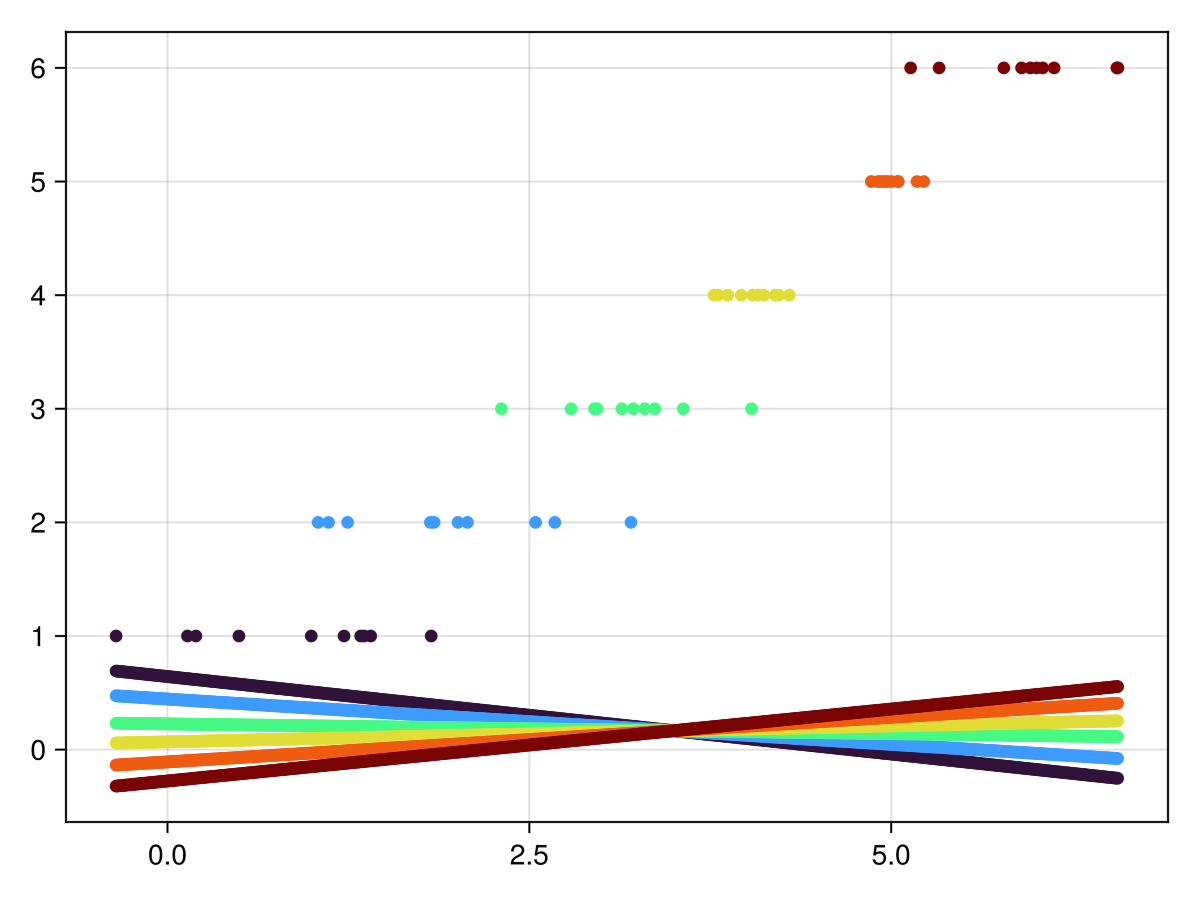

In [238]:
function linreg_t(t, nt, N)
    A = hcat(ones(n*N), vcat(t, nt))
    y = vcat(ones(n), zeros((N-1)*n))
    v = A\y
    b, w = v
    return b, w
end

function display_linreg(t, nt)
    b, w = linreg_t(t, nt)
    xmin = minimum(vcat(t, nt))
    xmax = maximum(vcat(t, nt))
    x = xmin:0.01:xmax
    y = b .+ w .* x

    fig = Figure()
    ax = Axis(fig[1,1])
    scatter!(t, ones(n))
    scatter!(nt, zeros((N-1)*n))
    scatter!(x,y)

    return fig
end

function display_linregs(ts, nts, N)
    fig = Figure()
    ax = Axis(fig[1,1])
    cmap = cgrad(:turbo, length(ts), categorical=true)

    for (i, (t, nt)) in enumerate(collect(zip(ts, nts)))
        b,w = linreg_t(t, nt, N)
        xmin = minimum(vcat(t, nt))
        xmax = maximum(vcat(t, nt))
        x = xmin:0.01:xmax
        y = b .+ w .* x

        color = cmap[i]
        scatter!(x,y, color = color)
        scatter!(t, fill(i, n), color = color)
    end
    return fig
end

function quad_risk(t, nt)
    b, w = linreg_t(t, nt)
    loss = sum((b .+ w .* t .- ones(n)).^2) + sum((b .+ w .* nt .- zeros(2*n)).^2)

    risk = loss / (N*n)
    return risk
end

ks = []
N = 6
for i in 1:N
    idist = Normal(i, rand())
    is = rand(idist, n)
    push!(ks, is)
end

non_ks = [ vcat(ks[1:i-1]..., ks[i+1:N]...) for i in 1:N]

fig5 = display_linregs(ks, non_ks, N)
# vcat([1,2,3],[4,5,6])

In [ ]:
# fig1 = display_linreg(as, vcat(bs,cs))
# fig2 = display_linreg(bs, vcat(as,cs))
# fig3 = display_linreg(cs, vcat(as,bs))


# risk_a = quad_risk(as, non_as)
# risk_b = quad_risk(as, non_bs)
# risk_c = quad_risk(as, non_cs)

# fig4 = display_linregs((as,bs,cs),(non_as,non_bs,non_cs))

In [226]:
zeros(0)

Float64[]